In [12]:
# import modules
from keras.layers import Input, Dense

# Create input layer here with shape 1. NOTE: the shape argument of the Input() functionr requires a tuple
input_tensor = Input(shape=(1,))

# Define output (Dense) layer of shape 1
output_layer = Dense(1, name='Predicted-Score')

# Connecting the two layers
output_tensor = output_layer(input_tensor)

# OR create output_layer and connect it to input layer in one step:
output_tensor = Dense(1)(input_tensor)

In [13]:
# Define model
from keras.models import Model
model = Model(input_tensor, output_tensor)

In [14]:
# Compile model (define loss, optimizer, hyperparameters)
model.compile(optimizer='adam', loss='mean_absolute_error')

# show summary of model
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


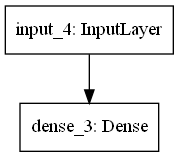

In [15]:
# Plotting a model
from keras.utils import plot_model
import pydotplus
from keras.utils import vis_utils
from keras.utils.vis_utils import model_to_dot
vis_utils.pydot = pydotplus

# plot + save the model graph plot
plot_model(model, to_file ='model.png')

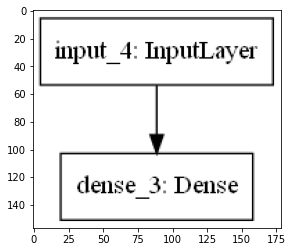

In [16]:
# visualise the saved plot
from matplotlib import pyplot as plt
img = plt.imread('model.png')
plt.imshow(img)
plt.show()

In [20]:
# Fit model
import pandas as pd
##  read data basketball game sexample
games = pd.read_csv('..\data\\test_data\\games_tourney.csv')
games.head()

## fit the model to input data
model.fit(games['seed_diff'],   # the predictor
          games['score_diff'],  # the target variable
          epochs=1,             # number of epochs
          batch_size=128,        # batch size
          validation_split=.20, # define cross-validation (holdout set) split
          verbose=True)         # show progress



27/27 [==============================] - 0s 2ms/step - loss: 16.5288 - val_loss: 15.4838


In [21]:
# Evaluating the model
# Load the X variable from the test data
X_test = games['seed_diff']

# Load the y variable from the test data
y_test = games['score_diff']

# Evaluate the model on the test data
print(model.evaluate(X_test, y_test, verbose=False))

16.261810302734375
